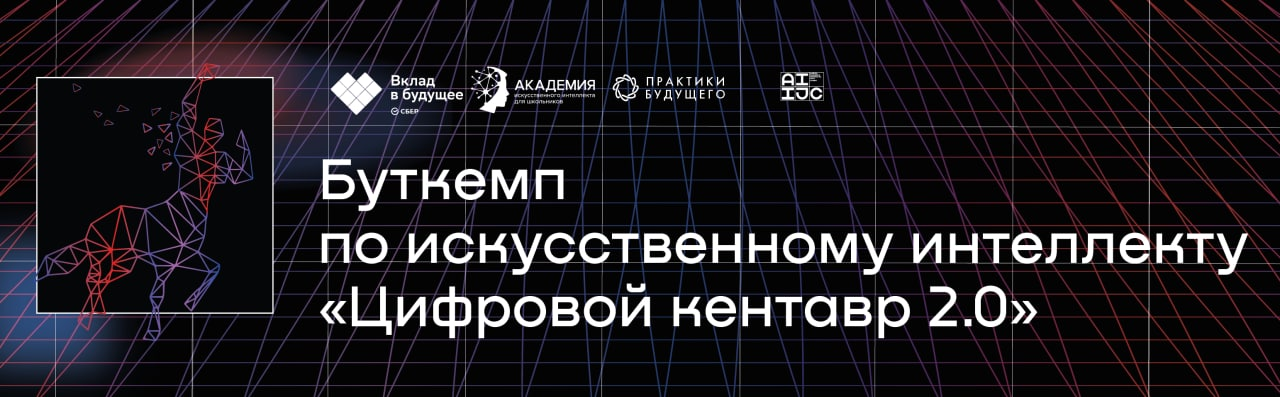

# Нейронные сети и Keras: быстрый старт.

**В этой тетради мы** 
* повторим основные термины, связанные с нейросетями;
* познакомимся с библиотекой Keras для построения нейросетевых моделей и набором данных MNIST;
* подготовим данные к обучению модели;
* созадим и обучим простую нейросетевую модель классификации рукописных цифр;

---


# Введение в нейронные сети

## Напоминание. Что такое нейросеть?

Простейшая нейросеть состоит из **нейронов** - вычислительных узлов. 

<img src="https://intuit.ru/EDI/21_01_20_1/1579558792-21349/tutorial/25/objects/11/files/11_1.png" width="400">

 













Нейроны объединяются в слои. **Полносвязные слои** (dense layers) нейронов: все элементы входных данных связаны с каждым нейроном.

Слои нейронов между входными и выходными данными называются **скрытыми слоями** (hidden layers). Чем больше слоев, тем **глубже** нейросеть.

<img src="https://neurohive.io/wp-content/uploads/2018/07/neuronnaya-set.gif" width="500">


Нейросеть можно строить из множества "блоков" (слоев), как конструктор. Каждый блок может обладать своей архитектурой, независимо вычисляя выходные данные и градиенты.

<table>
<tr>
<td><img src="https://spectrum.ieee.org/image/MjkxMjcwNg.octet-stream" width="400"></td>
<td><img src="https://img.icons8.com/plasticine/2x/arrow.png" width="200"></td>
<td><img src="https://payload.cargocollective.com/1/14/467087/7241356/lego%20cerebro%20definitivo_1_905.jpg" width="500"></td>
</tr>





---

## Библиотека Keras

Основные возможности

<img src="https://keras.io/img/keras-logo-small-wb.png" width="300">

* Библиотека для машинного обучения (прежде всего, для обучения нейронных сетей) на языке Python

* **Keras**  - удобный "пользовательский интерфейс", надстройка над более низкоуровневыми библиотеками (например, TensorFlow), позволяющая строить нейронные сети с высокой эффективностью и скоростью. 

* Основные принципы: 
    1. Удобство использования
    2. Модульность
    3. Масштабируемость
    4. Работа с Python
    
Инструмент с низким порогом входа, подходящий как продвинутым исследователям, так и любителям.


---



## Набор данных MNIST


MNIST — один из стандартных датасетов с изображениями для тестирования алгоритмов машинного обучения. 

Он содержит 60 000 образцов рукописного написания цифр от 0 до 9. Все картинки представлены в оттенках серого и имеют размер 28х28 пикселей.  

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

Мы будем строить модели для определения цифры по ее рукописному изображению, и, соответственно, решать задачу 10-классовой классификации. 




---




## План анализа данных

  1. Загрузить данные для обучения;
  2. Обработать данные перед обучением модели;
  3. Создать модель для обучения;
  4. Обучить модель на обучающей выборке;
  5. Провалидировать модель на тестовой выборке;
  6. Попробовать улучшить модель.



---


Загрузим необходимые библиотеки: `keras` для работы с нейросетями, `numpy` для проведения вычислений над массивами данных, `matplotlib` для построения графиков. 

* Наша нейронная сеть будет делать ряд последовательных преобразований входных данных, поэтому нам нужен тип нейронных сетей Sequential: импортируем его из раздела `keras.models`.

* Типы преобразований, с которыми мы будем работать: 
  - плотный слой Dense
  - активация Activation
  - преобразование картинки в длинный вектор Flatten. 

Каждое преобразование будет отдельным слоем в последовательной модели, поэтому импортируем их из `keras.layers`

In [2]:
# %tensorflow_version 1.xabs 

# Импортируем сам keras
import keras 
# Последовательный тип модели
from keras.models import Sequential
# Импортируем полносвязный слой, слои активации и слой, превращающий картинку в вектор
from keras.layers import Dense, Activation, Flatten
# Импортируем датасеты, чтобы вытащить оттуда нужные нам данные
import keras.datasets

import numpy as np
from matplotlib import pyplot as plt

Keras является оболочкой для более низкоуровневых библиотек, в нашем случае мы используем tensorflow. 


У tensorflow на данный момент поддерживаются две версии, установим первую.

In [3]:
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


Отключим лишние предупреждения от библиотек, в частности, от tensorflow, чтобы не засорять вывод наших результатов.

In [4]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False
import warnings
warnings.filterwarnings("ignore")

## 1. Загрузка данных. 

В keras уже есть несколько популярных датасетов, которые можно легко загрузить. Давайте загрузим набор данных MNIST.

In [5]:
# Импортируем модуль датасета MNIST
from keras.datasets import mnist

In [6]:
# Выгрузим тренировочные и тестовые данные при помощи метода load_data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

В обучающей выборке 60000 изображений, по 6000 изображения каждого класса. В тестовой - 10000 изображений, по 1000 изображений каждого класса. 

Посмотрим на содержание датасета, вызвав функцию `plot_MNIST_samples`,
которая строит на одной картинке **N** самплов из массива картинок
**X_train** для каждого класса.

*Вам не надо разбираться в коде функции, представленной ниже. Но для интересующихся мы добавили подробные комментарии к этой функции.*

In [7]:
def plot_MNIST_samples(image_data, label_data, classes,  N=8):
  """
    Эта функция строит N сэмплов каждого класса из датасета image_data

    Параметры
    ----------
    image_data : array, массив изображений размером 
                (number_of_samples, image_width, image_height, number of channels)
    label_data : array, массив меток размером 
                (number_of_samples, )
    classes : list, лист с именами классов
    N : int, кол-во сэмплов для каждого класса 

  """

  # определяем кол-во классов
  num_classes = len(classes)

  # определяем сетку для будующих изображений, размером num_classes*N
  plt.figure(figsize=(num_classes,N))

  # для каждого класса
  for i, y in enumerate(classes):

      # определяем соответствующие ему индексы
      idxs = np.flatnonzero(label_data == y)

      # из них случайно выбираем N 
      idxs = np.random.choice(idxs, N, replace=False)

      # проходим по каждому индексу и рисуем соответствующие изображения
      for i, idx in enumerate(idxs):
          plt_idx = i * num_classes + y + 1
          plt.subplot(N, num_classes, plt_idx)
          plt.imshow(image_data[idx], cmap='gray')
          plt.axis('off')
          if i == 0:
              plt.title(str(y))
  plt.show()

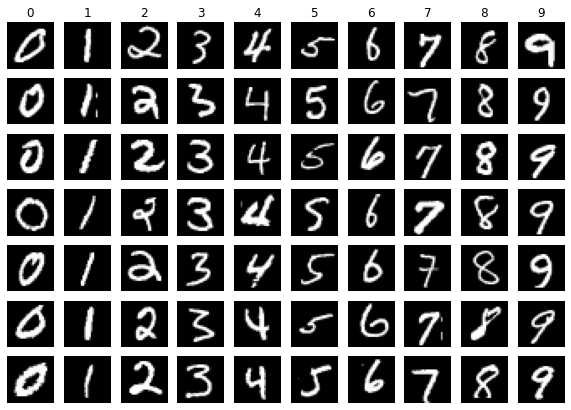

In [8]:
# Создадим лист с именами классов - цифрами от 0 до 9
classes = list(range(0,10))

# Выведем 7 наборов цифр
plot_MNIST_samples(X_train, y_train, classes, N=7)

## 2. Подготовка данных 
**Нормализация значений на [0,1]**




Нейронные сети более капризны по сравнению с линейными моделями и моделями на основе решающих деревьев. Поэтому им особенно нужна предварительная нормализация данных: чтобы значения всех входных признаков лежали в интервале от $0$ до $1$. 

Мы работаем с картинками, где каждый пиксель - это целое число от $0$ до $255$. У черно-белых картинок - это одно число, а у цветных - три таких числа, соответствующие каналам RGB.

Таким образом, нормализацию картинки можно сделать простым делением на $255$. Это классический трюк при работе с изображениями. 

In [9]:
X_train = X_train / 255 
X_test = X_test / 255

**Перевод целевой переменной в one-hot формат**

Сейчас наша целевая переменная - картинки, закодированные цифрами от $0$ до $9$, то есть $10$ классов. 
Для того чтобы нейронная сеть предсказывала вероятность принадлежности *к каждому* из этих десяти классов, нужно значение выходной переменной перевести в **one-hot формат**.

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)


Напомним, что такое **one-hot encoding**. 

После one-hot encoding истинным значением целевой переменной будет вектор длины $10$, состоящий из $0$ с одной $1$ на месте номера класса, к которому принадлежит картинка.

Это делается функцией `keras.utils.to_categorical()`, которая принимает на вход исходный вектор значений целевой переменной и число классов.

In [11]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [12]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [13]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Посмотрим на то, в каком виде у нас хранятся входные признаки, напечатав размер первого объекта из обучающей выборки с помощью метода `shape`. 

Для данных MNIST это изображения 28 на 28.

In [14]:
input_size = X_train[0].shape
input_size

(28, 28)

In [15]:
X_train.shape

(60000, 28, 28)

## 3. Создание модели для обучения

Sequential здесь означает последовательный тип модели, в который мы добавляем слои друг за другом. Инициализируем модель:

In [16]:
# Создаем пустую модель
model = Sequential()

В нашей задаче признаки - это матрица пикселей размером 28х28.  Для начала попробуем подать эти признаки напрямую, растянув матрицу в один длинный вектор. Это один из классических способов подавать изображения на вход нейронной сети. 


<img src="https://ml4a.github.io/images/figures/mnist_2layers.png" width="600">



Итак, будем строить следующую модель:

* сначала растягиваем картинку в длинный вектор слоем `Flatten`. Получается, что одной картинке соответствует 28*28=784 признака. 
* потом идет полносвязный слой из 128 нейронов. Каждый из 128 нейронов принимает на вход 784 признака с предыдущего слоя, некоторым образом изменяет входные значения во время тренировки и передает одно значение на следующий слой.
* далее используем функцию активации `ReLU`
* потом идет следующий полносвязный слой. В нем $10$ выходов - по числу классов. В этом слое каждый из 10 нейронов принимает на вход 128 нейронов предыдущего слоя.
* в конце используем функцию активации `SoftMax`

**ReLU** - стандартный выбор для функции активации нейронов внутри нейросети. Несмотря на простоту функции, эксперименты показывают, что эта функция активации достаточна для эффективного обучения нейросетей.

**Softmax** - функция активации для выходного слоя нейронов в задачах классификации с числом классов $>2$. Она переводит выходные значения сети в вероятности принадлежности конкретного элемента выборки к одному из классов.

*Важно: в первом слое `Sequential` модели keras необходимо указать размерность входных данных $28*28=784$ , перед активацией делаем плотный слой с размерностью $10$ по числу классов*




![](https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/73_blog_image_1.png)

In [17]:
# Этот слой вытягивает двумерную картинку в вектор
model.add(Flatten(input_shape=input_size))

# Добавляем скрытый полносвязный слой из 128 нейронов
model.add(Dense(units=128, input_shape=input_size))

# И активацию для скрытого слоя нейронов
model.add(Activation('relu'))

# Добавляем выходной полносвязный слой из 10 нейронов
model.add(Dense(units=10))

# Чтобы получить на выходе вероятности для каждого класса, выбираем активацию
# softmax
model.add(Activation('softmax'))

Softmax - это Sigmoid для многоклассовой классификации

![](https://miro.medium.com/proxy/1*XxxiA0jJvPrHEJHD4z893g.png)

После описания архитектуры необходимо скомпилировать модель при помощи метода `compile`, указав
* параметр `loss` - минимизируемую функцию потерь, которая измеряет насколько желаемый прогноз далек от фактического;
* параметр `optimizer` - оптимизатор, который будет подгонять веса модели;
* параметр `metrics` - метрику для мониторинга работы нейросети на отложенной выборке в процессе обучения.

В качестве функции потерь выберем `categorical entropy`, в качестве оптимизатора - Адам, в качестве метрики - количество правильно угаданных меток, `accuracy`.

<img src="https://leakyreluhome.files.wordpress.com/2020/01/ce_loss.png?w=352" width="300">

Adam - это способ минимизировать ошибку модели

![](https://miro.medium.com/max/670/0*_WJJ989JituXPIBM.png)

In [18]:
# Компилируем модель
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Обучение и валидация нейронной сети

## 4. Обучение модели
**Обучение нейросети** - изменение **весов** нейронов при помощи метода обратного распространения ошибки

Полная структура модели задана, теперь будем ее обучать. Обучаем ее аналогично `sklearn` - с помощью метода `fit` (см. предыдущий семинар).

После запуска `fit` параметры оптимизируются с помощью выбранного оптимизатора `optimizer`. Фактически, это некоторое производное от алгоритма градиентного спуска. На каждом шаге градиентного спуска мы используем выбранную функцию потерь `loss`, которая подсчитана только на части выборки. 


Два дополнительных параметра для обучения:
* **batch_size** - размер подвыборки, которая используется для одного шага оптимизации = 40 
* **epochs** - число эпох - сколько раз мы проходим полностью по всей выборке

[Эксперименты](https://arxiv.org/abs/1609.04836) показывают, что выбор **batch_size** в диапазоне $32-512$ в среднем обеспечивает нормальную генерализационную способность нейросети, то есть помогает модели делать лучшие предсказания на новых данных, не присутствующих в тренировочной выборке. 

Количество эпох **epochs** обычно выбирают так, чтобы метрика качества на валидационной выборке перестала убывать, но при этом не росла, то есть, не произошло переобучения. 

В целом, подбор подобных макропараметров сети является отдельным классом задач, поскольку одна и та же архитектура нейросети может значительно улучшать/ухудшать результаты предсказаний в зависимости от выбранных значений.

In [19]:
model.fit(X_train, y_train, epochs=5, batch_size=40)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2687 - acc: 0.9234
Epoch 2/5
60000/60000 [==============================] - 8s 141us/sample - loss: 0.1243 - acc: 0.9637
Epoch 3/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0868 - acc: 0.9741
Epoch 4/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0652 - acc: 0.9806
Epoch 5/5
60000/60000 [==============================] - 11s 175us/sample - loss: 0.0494 - acc: 0.9851


При использовании keras в процессе тренировки модели отображаются значение loss-функции и метрики для каждой эпохи, что очень удобно. Для валидации берется один из батчей из тренировочной выборки, поэтому точность может быть завышена. 

Еще можно посмотреть на нашу модель в целом: сколько в ней слоев, сколько параметров у каждого слоя с помощью команды model.summary()

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## 5. Валидация качества модели на тестовых данных.
Протестируем модель на тестовой выборке для этого используется метод `evaluate`.
Выводится **loss** и **точность**.

In [21]:
model.evaluate(X_test, y_test)

[0.07822203824603931, 0.9763]

Что это означает: для нашей модели на основе нейронной сети мы получаем точность 97.7% - то есть, с такой вероятностью модель определяет, какая цифра нарисована на картинке.

**Получение предсказаний классов на основе выходных данных нейросети.**

Как мы уже поняли, выходной слой нейросети возвращает нам вектор длиной $10$ (количество классов) с **вероятностями** принадлежности данного объекта каждому классу. Как же нам получить итоговые предсказания, то есть сами **номера классов**? 

Посмотрим, как получить номера классов по выходу нейронной сети, а заодно посмотри, как "в ручную" посчитать точность работы алгоритма. Мы ожидаем, что полученное число будет равно точности, выданной методом `evaluate()`.

Чтобы получить выход последнего слоя модели, надо использовать метод `predict()`.

In [22]:
# Метод predict модели возвращает выходные значения последнего слоя нейросети 
y_test_predictions = model.predict(X_test)

Напомним, что мы преобразовали вектор целевых переменных y_test в one-hot формат. В таком же формате мы получаем наши предсказания. 

Чтобы перевести строку в one-hot формате обратно в явную метку, нам надо взять номер места (индекс) самого большого числа в ней. Для реальных меток эта операция вернет номер места, где стоит единичка. А для полученных с помощью модели значений - индекс предсказаний с самой большой вероятностью. 

Используем `np.argmax()` из библиотеки **numpy**. В качестве аргумента передаем массив в one-hot формате (y_test/y_test_predictions) и указываем `axis=1`. Последний аргумент требуется, чтобы у нас максимум и его индекс искался не по всему массиву данных, а по строкам. 

In [23]:
y_predicted_classes=np.argmax(y_test_predictions, axis=1)
y_real_classes=np.argmax(y_test, axis=1)

In [24]:
y_predicted_classes, y_real_classes

(array([7, 2, 1, ..., 4, 5, 6]), array([7, 2, 1, ..., 4, 5, 6]))

Теперь можно посчитать точность наших предсказаний с помощью уже знакомой функции `accuracy_score()` из библиотеки **sklearn**.


In [25]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_real_classes, y_predicted_classes))

0.9763


**Упражнение (бонус)**. Сколько эпох нужно для полученной модели, чтобы начать переобучаться? *Подсказка:* при переобучении значения loss функции на обучающей выборке начинает уменьшаться.

In [26]:
# Создаем модель
model = Sequential()
model.add(Flatten(input_shape=input_size))
model.add(Dense(units=128, input_shape=input_size))
model.add(Activation('relu'))
model.add(Dense(units=10))
model.add(Activation('softmax'))

# Компилируем модель
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [27]:
model.fit(X_train, y_train, epochs=25, batch_size=40, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 13s 221us/sample - loss: 0.2735 - acc: 0.9229 - val_loss: 0.1503 - val_acc: 0.9544
Epoch 2/25
60000/60000 [==============================] - 9s 153us/sample - loss: 0.1214 - acc: 0.9647 - val_loss: 0.1058 - val_acc: 0.9670
Epoch 3/25
60000/60000 [==============================] - 7s 124us/sample - loss: 0.0838 - acc: 0.9757 - val_loss: 0.0856 - val_acc: 0.9743
Epoch 4/25
60000/60000 [==============================] - 11s 179us/sample - loss: 0.0634 - acc: 0.9808 - val_loss: 0.0821 - val_acc: 0.9741
Epoch 5/25
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0487 - acc: 0.9855 - val_loss: 0.0760 - val_acc: 0.9776
Epoch 6/25
60000/60000 [==============================] - 13s 217us/sample - loss: 0.0387 - acc: 0.9885 - val_loss: 0.0738 - val_acc: 0.9758
Epoch 7/25
60000/60000 [==============================] - 10s 158us/sample - loss: 0.0303 - acc: 0.9910 - va

**ЗДЕСЬ ВЫ ДОЛЖНЫ НАПИСАТЬ ВЫВОД О ПРИЧИНАХ И ОТВЕТИТЬ НА ВОПРОС**

**Ответ:** 
Нужно более 6 эпох, при таком количестве модель переобучается. Причина - начиная с 7 эпохи значения loss функции на обучающей выборке падает, а на валидационной начинает расти, модель показывает слишком хорошие результаты на обучении и плохо работает на валидации.

**Упражнение.** Сравните результат работы полученной модели с моделью логистической регрессии. Подумайте, как связаны модель логистической регрессии и нейросетевые модели. Можно ли построить логистическую регрессию с помощью Keras?



In [40]:
logit_model = Sequential()

# Добавьте архитектуру, соответствующую логистической регрессии.
logit_model = Sequential()
logit_model.add(Flatten(input_shape=input_size))
# Архитектура аналогичная логистической регрессии - это нейронная сеть с одним полносвязным слоем и активацией 
logit_model.add(Dense(units=10, kernel_regularizer='l2'))
logit_model.add(Activation('softmax'))

# Компилируем модель
logit_model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


In [41]:
# Обучаем модель
logit_model.fit(X_train, y_train, epochs=5, batch_size=40)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 59us/sample - loss: 1.0898 - acc: 0.8001
Epoch 2/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.7704 - acc: 0.8737
Epoch 3/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.7200 - acc: 0.8828
Epoch 4/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.6968 - acc: 0.8867
Epoch 5/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.6846 - acc: 0.8891


In [42]:
# Валидируем на тестовой выборке
logit_model.evaluate(X_test, y_test)

[0.6583246470451355, 0.8971]

**ЗДЕСЬ ВЫ ДОЛЖНЫ НАПИСАТЬ ВЫВОД О ПРИЧИНАХ**

**Ответ** Логистическая регрессия это частный случай полносвязной нейронной сети, по сути логистическая регрессия - это полносвязная нейронная сеть с одним(выходным) слоем, поскольку в ней заложена та же суть - сначала считается линейная комбинация из признаков какого-либо объекта и весов, а затем полученное значение переводят с помощью некоторой функции(sigmoid, softmax) в вероятность принадлежности к какому-либо классу. С помощью Keras можно создать модель логистической регрессии, схожей с той, которая есть в sklearn, для этого необходимо:
* поменять оптимизатор подбора весов с 'adam' на 'sgd' (stochastic gradient descent)
* добавить регуляризацию весов L2, указав параметр kernel_regularizer='l2' в слое, так как по умолчанию этот параметр NONE

Более простая модель ожидаемо показала результат хуже. 

**Упражнение.** Попробуйте увеличить количество скрытых слоев в исходной модели, уменьшая в два раза каждый следующий скрытый слой. Улучшится ли качество? 

In [47]:
# Добавьте архитектуру, соответствующую упражнению
model_2 = Sequential()
model_2.add(Flatten(input_shape=input_size))

model.add(Dense(units=128, input_shape=input_size))
model_2.add(Activation('relu'))

# уменьшаем кол-во нейронов в 2 раза
model.add(Dense(units=64, input_shape=input_size))
model_2.add(Activation('relu'))

# еще раз уменьшаем кол-во нейронов в 2 раза
model.add(Dense(units=32, input_shape=input_size))
model_2.add(Activation('relu'))

model_2.add(Dense(units=10))
model_2.add(Activation('softmax'))

In [48]:
# Компилируем модель
model_2.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

In [49]:
# Обучаем модель
model_2.fit(X_train, y_train, epochs=5, batch_size=40)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 162us/sample - loss: 0.4870 - acc: 0.8742
Epoch 2/5
60000/60000 [==============================] - 10s 171us/sample - loss: 0.3084 - acc: 0.9135
Epoch 3/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.2866 - acc: 0.9199
Epoch 4/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2756 - acc: 0.9235
Epoch 5/5
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2683 - acc: 0.9258


In [35]:
# Валидируем на тестовой выборке
model_2.evaluate(X_test, y_test)

[0.26561469310224056, 0.9269]

**ЗДЕСЬ ВЫ ДОЛЖНЫ НАПИСАТЬ ВЫВОД О ПРИЧИНАХ**

**Ответ** Качество не улучшилось. Задача, которая стоит перед нейросетью - слишком простая для такой "перегруженной" нейронной сети, модель зацикливается на ненужных деталях и переобучается, теряя обобщающую способность.

Однако, более сложная модель также показывает результат хуже. Дело в том, что с увеличением количества слоев увеличивается и количество подбираемых параметров, а значит и возможные ошибки. Выбор архитектуры нейронной сети - это искусство :) 



Можно ли еще улучшить результат? Можно! Как? **Узнаем на следующем семинаре!** 

<a target="_blank"><img src="https://i.pinimg.com/236x/0e/df/e8/0edfe8becb24d2d5ab3e52acc8ff9825.jpg" 
alt="IMAGE ALT TEXT HERE" width="360" border="0" /></a>

На этом семинаре: 

1.   Мы еще раз познакомились основными терминами нейросетей - **нейрон**, **слои**, **функция активации**, **функция ошибки (loss)**, **обучение/тренировка**, **батч**, **эпоха**.

2.  Начали учиться работать с библиотекой для нейронных сетей **`keras`**;

3.  На примере одного из самых популярных датасетов черно-белых картинок **MNIST** посмотрели, как строить нейросети для задачи **классификации**;

4. Узнали об основных слоях нейронной сети в `keras`: слой для превращения картинки в вектор **Flatten**, **полносвязный слой Dense**, слой с активацией **Activation**. 

5. Посмотрели, как получить предсказанные метки и оценить качество модели. 



